# Another Code
https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

In [93]:
p="./input/"
import pandas as pd
import os
import sys
import warnings
import numpy as np
warnings.filterwarnings("ignore")
pd.options.display.max_columns=100
pd.options.display.max_rows=100
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [8]:
train_df=pd.read_csv(os.path.join(p,"train.csv"))
test_df=pd.read_csv(os.path.join(p,"test.csv"))

In [9]:
print(train_df.shape)
print(test_df.shape)
train_df.head()

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train_df["Age"].fillna(train_df.Age.median(),inplace=True)

In [30]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


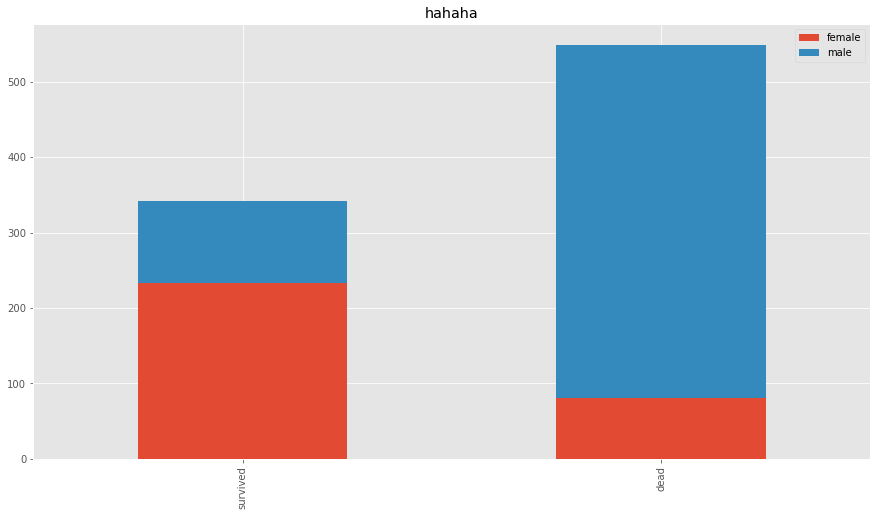

In [43]:
survived_sex=train_df[train_df["Survived"]==1]["Sex"].value_counts()
dead_sex=train_df[train_df["Survived"]==0]["Sex"].value_counts()
is_survived_df=pd.DataFrame([survived_sex,dead_sex])
is_survived_df.index=["survived","dead"]
is_survived_df.plot(kind='bar',stacked=True,figsize=(15,8),use_index=True,title="hahaha")

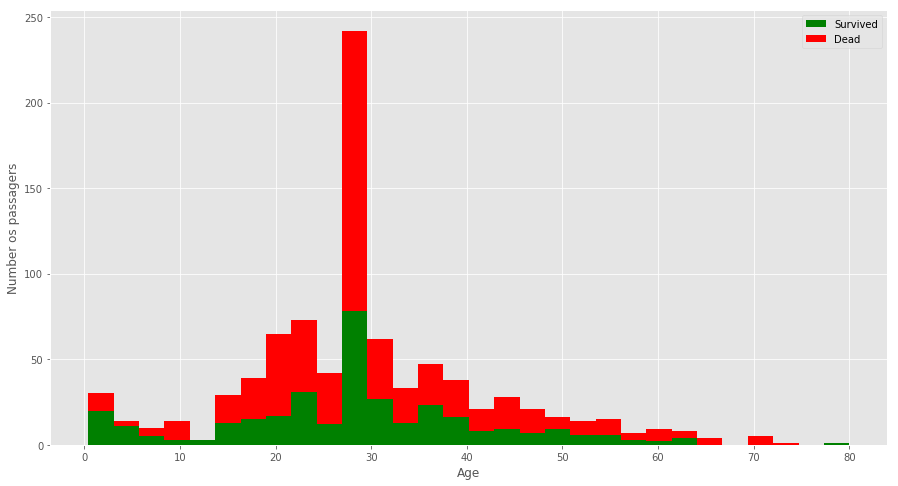

In [60]:
survived_age=train_df[train_df["Survived"]==1]["Age"]
dead_age=train_df[train_df["Survived"]==0]["Age"]

fig=plt.figure(figsize=(15,8))
plt.hist([survived_age,dead_age],stacked=True,color=["g","r"],bins=30,label=["Survived","Dead"])
plt.xlabel("Age")
plt.ylabel("Number os passagers")
plt.legend()

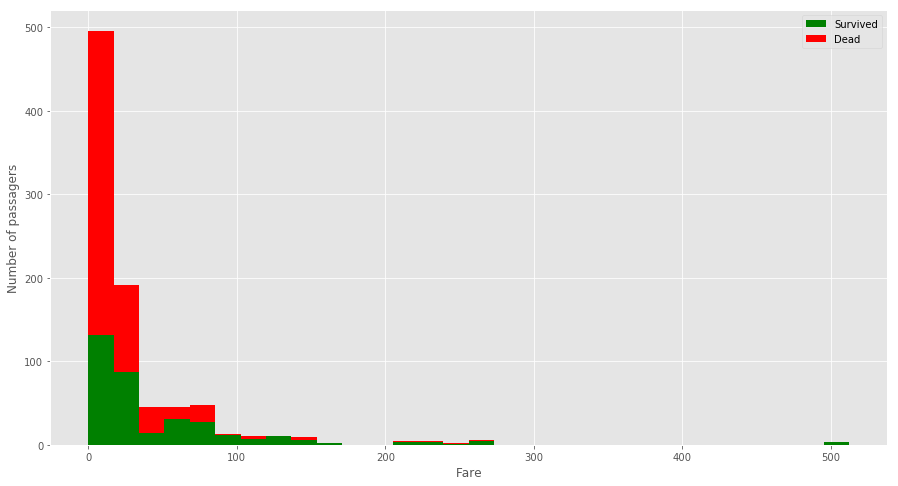

In [64]:
survived_fare=train_df[train_df["Survived"]==1]["Fare"]
dead_fare=train_df[train_df["Survived"]==0]["Fare"]
fig=plt.figure(figsize=(15,8))

plt.hist([survived_fare,dead_fare],stacked=True,color=["g","r"],bins=30,label=["Survived","Dead"])
plt.xlabel("Fare")
plt.ylabel("Number of passagers")
plt.legend()

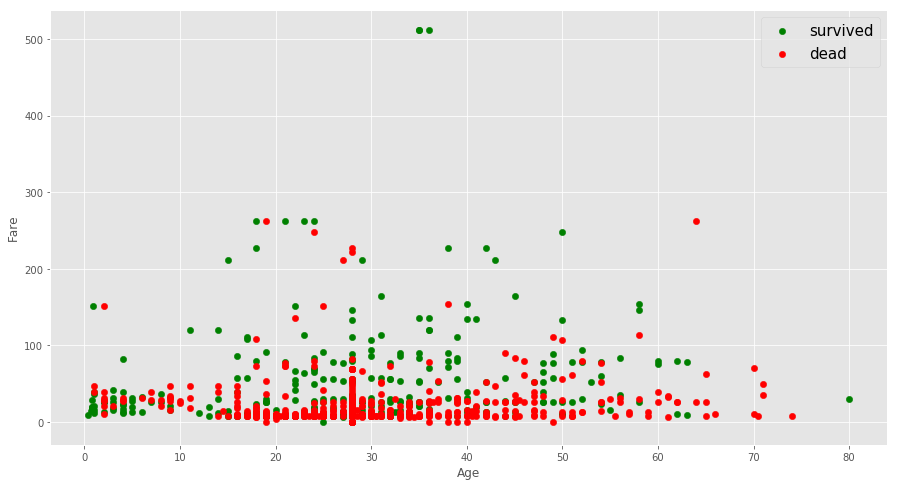

In [67]:
plt.figure(figsize=(15,8))
ax=plt.subplot()
ax.scatter(survived_age,survived_fare,c="green",s=40)
ax.scatter(dead_age,dead_fare,c="red",s=40)
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.legend(("survived","dead"),scatterpoints=1,loc="best",fontsize=15)

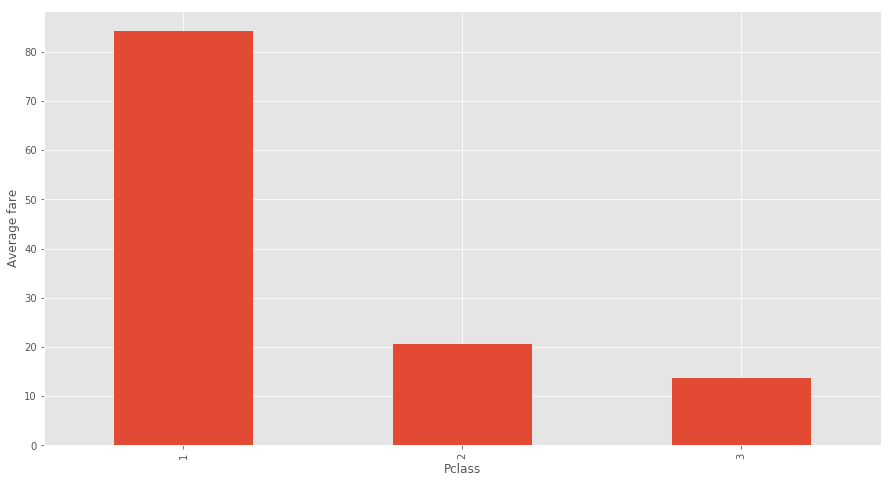

In [68]:
ax=plt.subplot()
ax.set_ylabel("Average fare")
train_df.groupby("Pclass").mean()["Fare"].plot(kind='bar',figsize=(15,8),ax=ax)

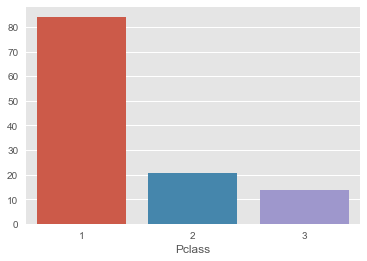

In [77]:
x_for_sns=train_df.groupby("Pclass").mean()["Fare"]
sns.barplot(x=x_for_sns.index,y=x_for_sns.values)

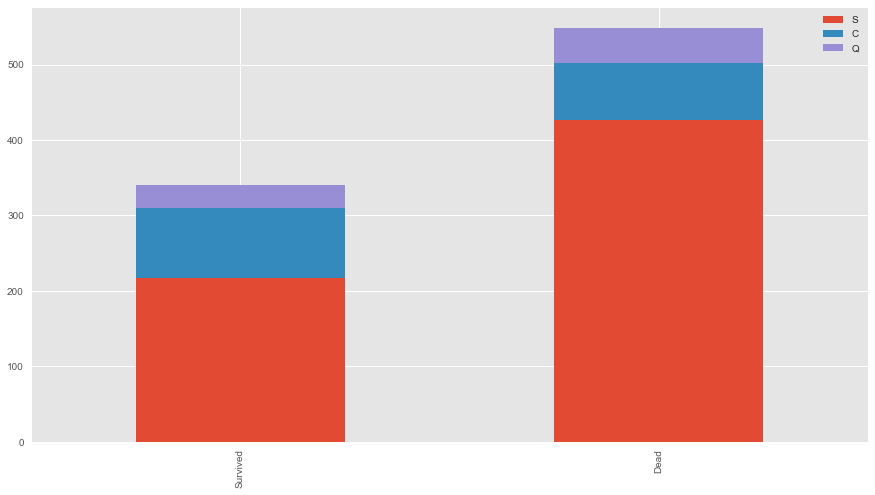

In [78]:
survived_embark=train_df[train_df['Survived']==1]['Embarked'].value_counts()
deat_embark=train_df[train_df['Survived']==0]['Embarked'].value_counts()
df=pd.DataFrame([survived_embark,deat_embark])
df.index=["Survived","Dead"]
df.plot(kind='bar',stacked=True,figsize=(15,8))

## Feature Engineering

In [79]:
def status(feature):
    print('Processing',feature,':ok!')

In [80]:
train_df.drop('Survived',axis=1,inplace=True)
combined=train_df.append(test_df)
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
combined.reset_index(inplace=True)
combined.drop('index',inplace=True,axis=1)
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
combined.shape

(1309, 11)

In [85]:
def get_titles():
    global combined
    combined['Title']=combined['Name'].map(lambda name:name.split(",")[1].split('.')[0].strip())
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    combined['Title']=combined.Title.map(Title_Dictionary)

In [86]:
get_titles()

In [87]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [89]:
grouped_train=combined.head(891).groupby(["Sex","Pclass","Title"])
grouped_median_train=grouped_train.median()
grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [90]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  29.5    0.0    0.0   88.25000
              Mrs            499.0  38.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  22.0    0.0    0.0    8.75625
              Mrs            405.5  29.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  36.0    0.0    0.0   42.40000
              Officer        648.0  50.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  30.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   6.5    3.5    1.0   28.51250
              Mr             472.0  28.0    0.0    0.0    7.89580

In [91]:
def process_age():
    global combined
    def fillAges(row,grouped_median):
        if row["Sex"]=="female" and row["Pclass"]==1:
            if row["Title"]=="Miss":
                return grouped_median.loc["female",1,"Miss"]["Age"]
            elif row["Title"]=="Mrs":
                return grouped_median.loc["female",1,"Mrs"]["Age"]
            elif row["Title"]=="Officer":
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    combined.head(891).Age=combined.head(891).apply(lambda r:fillAges(r,grouped_median_train) if np.isnan(r["Age"]) else r['Age'],axis=1)
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    status("age")

In [94]:
process_age()

Processing age :ok!


In [95]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [97]:
def process_names():
    global combined
    combined.drop("Name",axis=1,inplace=True)
    titles_dummies=pd.get_dummies(combined["Title"],prefix="Title")
    combined=pd.concat([combined,titles_dummies],axis=1)
    combined.drop("Title",axis=1,inplace=True)
    status("Name")

In [98]:
process_names()

Processing Name :ok!


In [99]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [100]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1308 non-null float64
Cabin            295 non-null object
Embarked         1307 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 110.0+ KB


In [112]:
def process_fares():
    global combined
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(),inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(),inplace=True)
    status("Fare")

In [113]:
process_fares()

Processing Fare :ok!


In [105]:
def process_embarked():
    global combined
    combined.head(891).Embarked.fillna("S",inplace=True)
    combined.iloc[891:].Embarked.fillna("S",inplace=True)
    
    embarked_dummies=pd.get_dummies(combined["Embarked"],prefix="Embarked")
    combined=pd.concat([combined,embarked_dummies],axis=1)
    combined.drop("Embarked",axis=1,inplace=True)
    status("Embarked")

In [106]:
process_embarked()

Processing Embarked :ok!


In [107]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [108]:
def process_cabin():
    global combined
    combined.Cabin.fillna("U",inplace=True)
    combined["Cabin"]=combined["Cabin"].map(lambda c:c[0])
    cabin_dummies=pd.get_dummies(combined["Cabin"],prefix="Cabin")
    combined=pd.concat([combined,cabin_dummies],axis=1)
    combined.drop("Cabin",axis=1,inplace=True)
    status("cabin")

In [109]:
process_cabin()

Processing cabin :ok!


In [110]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [114]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

In [115]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [116]:
def process_sex():
    global combined
    combined["Sex"]=combined["Sex"].map({"female":0,"male":1})
    status("Sex")

In [117]:
process_sex()

Processing Sex :ok!


In [122]:
def process_pclass():
    global combined
    pclass_dummies=pd.get_dummies(combined["Pclass"],prefix="Pclass")
    combined=pd.concat([combined,pclass_dummies],axis=1)
    combined.drop("Pclass",axis=1,inplace=True)
    status("pclass")

In [123]:
process_pclass()

Processing pclass :ok!


In [124]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,4,0,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,5,1,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [152]:
def process_ticket():
    global combined
    def cleanTicket(ticket):
        ticket=ticket.replace('.','')
        ticket=ticket.replace('/','')
        ticket=ticket.split()
        ticket=map(lambda x:x.split(),ticket)
        ticket=list(filter(lambda t:not t.isdigit(),ticket))
        if len(ticket)>0:
            return ticket[0]
        else:
            return "XXX"
        
    combined["Ticket"]=combined["Ticket"].map(cleanTicket)
    ticket_dummies=pd.get_dummies(combined.Ticket,prefix="Ticket")
    combined=pd.concat([combined,ticket_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)
    status("Ticket")

In [154]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,[A5],7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2,0,38.0,1,0,[PC],71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,[STONO2],7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,4,0,35.0,1,0,[113803],53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,5,1,35.0,0,0,[373450],8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [155]:
combined.drop("Ticket",axis=1,inplace=True)

In [156]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [157]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
    
    status('family')

In [158]:
process_family()

Processing family :ok!


In [159]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0


In [160]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0


In [161]:
combined.drop("PassengerId",axis=1,inplace=True)

In [162]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0


In [208]:
from sklearn.pipeline import  make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.cross_validation import StratifiedKFold,cross_val_score
from sklearn.ensemble.gradient_boosting import  GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [166]:
def compute_score(clf,X,y,scoring="accuracy"):
    xval=cross_val_score(clf,X,y,cv=5,scoring=scoring)
    return np.mean(xval)

In [167]:
def recover_train_test_target():
    global combined
    targets=pd.read_csv(os.path.join(p,"train.csv")).Survived
    train=combined.head(891)
    test=combined.iloc[891:]
    return train,test,targets


In [168]:
train,test,target=recover_train_test_target()

In [169]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
      ..
841    0
842    1
843    0
844    0
845    0
846    0
847    0
848    0
849    1
850    0
851    0
852    0
853    1
854    0
855    1
856    1
857    1
858    1
859    0
860    0
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [171]:
clf=RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [177]:
features=pd.DataFrame()
features["feature"]=train.columns
features["importance"]=clf.feature_importances_
features.sort_values(by="importance",ascending=True,inplace=True)
features.set_index("feature",inplace=True)

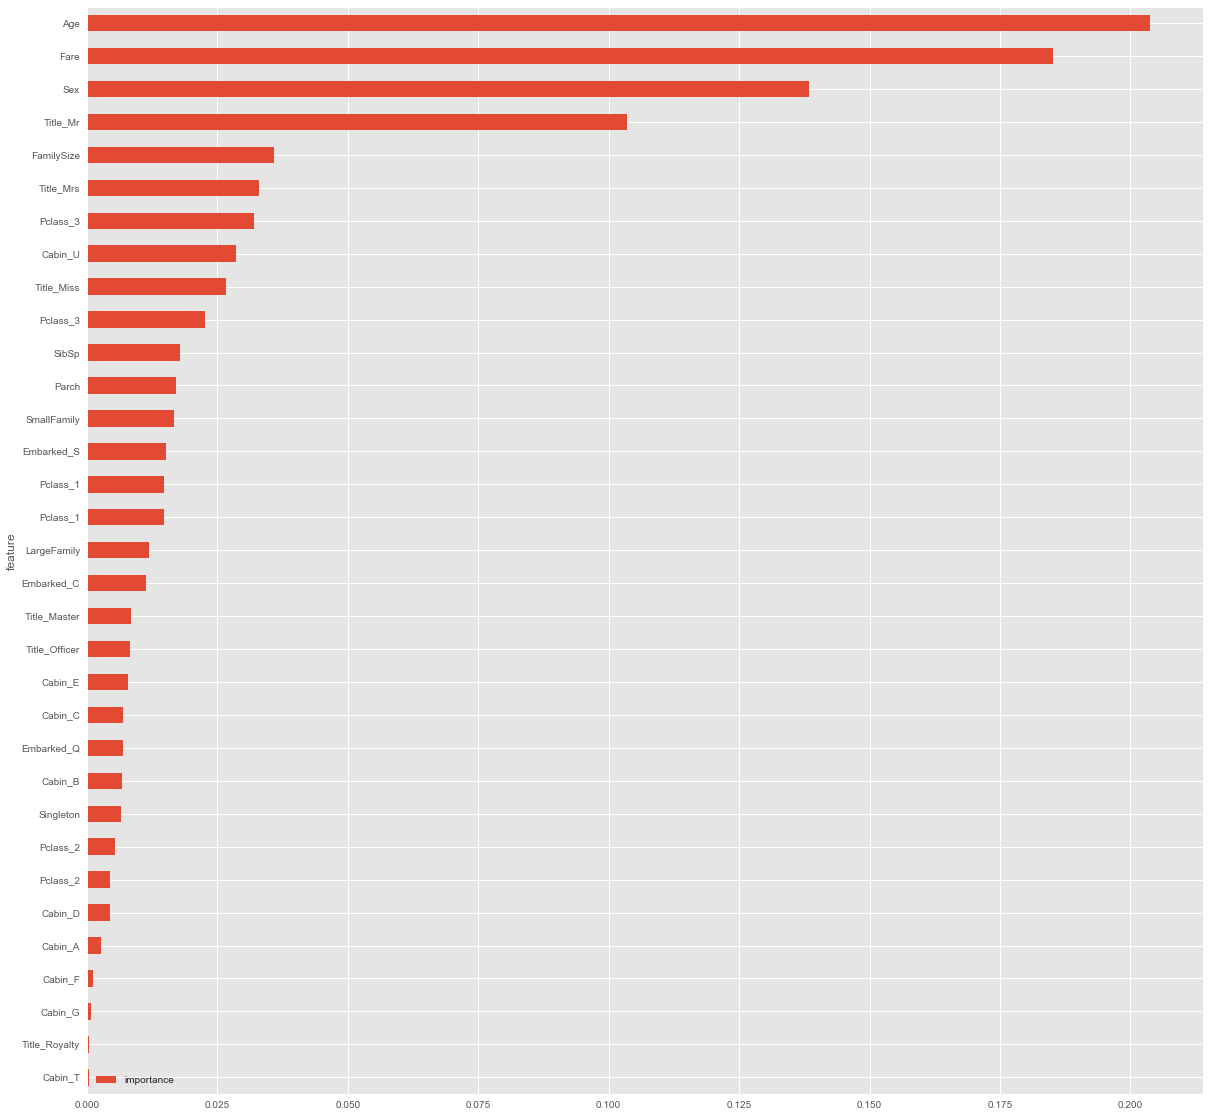

In [178]:
features.plot(kind="barh",figsize=(20,20))

In [182]:
model=SelectFromModel(clf,prefit=True)
train_reduced=model.transform(train)
train_reduced.shape

(891, 7)

In [186]:
test_reduced=model.transform(test)
test_reduced.shape

(418, 7)

In [202]:
run_gs=False
if run_gs:
    parameter_grid={
        'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
    }
    forest=RandomForestClassifier()
    cross_validation=StratifiedKFold(target,n_folds=5)
    grid_search=GridSearchCV(forest,scoring="accuracy",param_grid=parameter_grid,
                             cv=cross_validation)
    grid_search.fit(train,targets)
    model=grid_search
    parameters=grid_search.best_params_
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)

In [193]:
compute_score(model, train, target, scoring='accuracy')

0.8215785802260951

In [195]:
from sklearn.model_selection import KFold

In [209]:
?GridSearchCV

In [204]:
cross_validation=StratifiedKFold(target,n_folds=5)

In [206]:
type(cross_validation)

sklearn.cross_validation.StratifiedKFold